Exploratory Analysis of Yelp Datasets

In [1]:
from google.colab import drive # mounting drive for loading datasets.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing Required packages for Data Exploration

In [2]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import pprint
from tabulate import tabulate
os.chdir('/content/drive/My Drive/YelpDataset')

Populating the interactive namespace from numpy and matplotlib


Identifying Maximum Reviews w.r.t business categories

In [3]:
business_categories_vs_reviews = pd.read_csv('business-categories-reviews.csv') # csv file  Contains 2 columns, business categories and their reviews in each category
business_categories_vs_reviews = business_categories_vs_reviews.pivot_table('Review Count', index='Category').sort_values(by='Review Count', ascending=False)[:30]
print("Business Categories with maximum number of Review count")
display(business_categories_vs_reviews.head(20))
print (len(business_categories_vs_reviews))

Business Categories with maximum number of Review count


,Review Count
Category,
Restaurants,3221032
Food,991892
Nightlife,877146
Bars,806693
American (New),520330
American (Traditional),520318
Breakfast & Brunch,461388
Event Planning & Services,387017
Shopping,384524


30


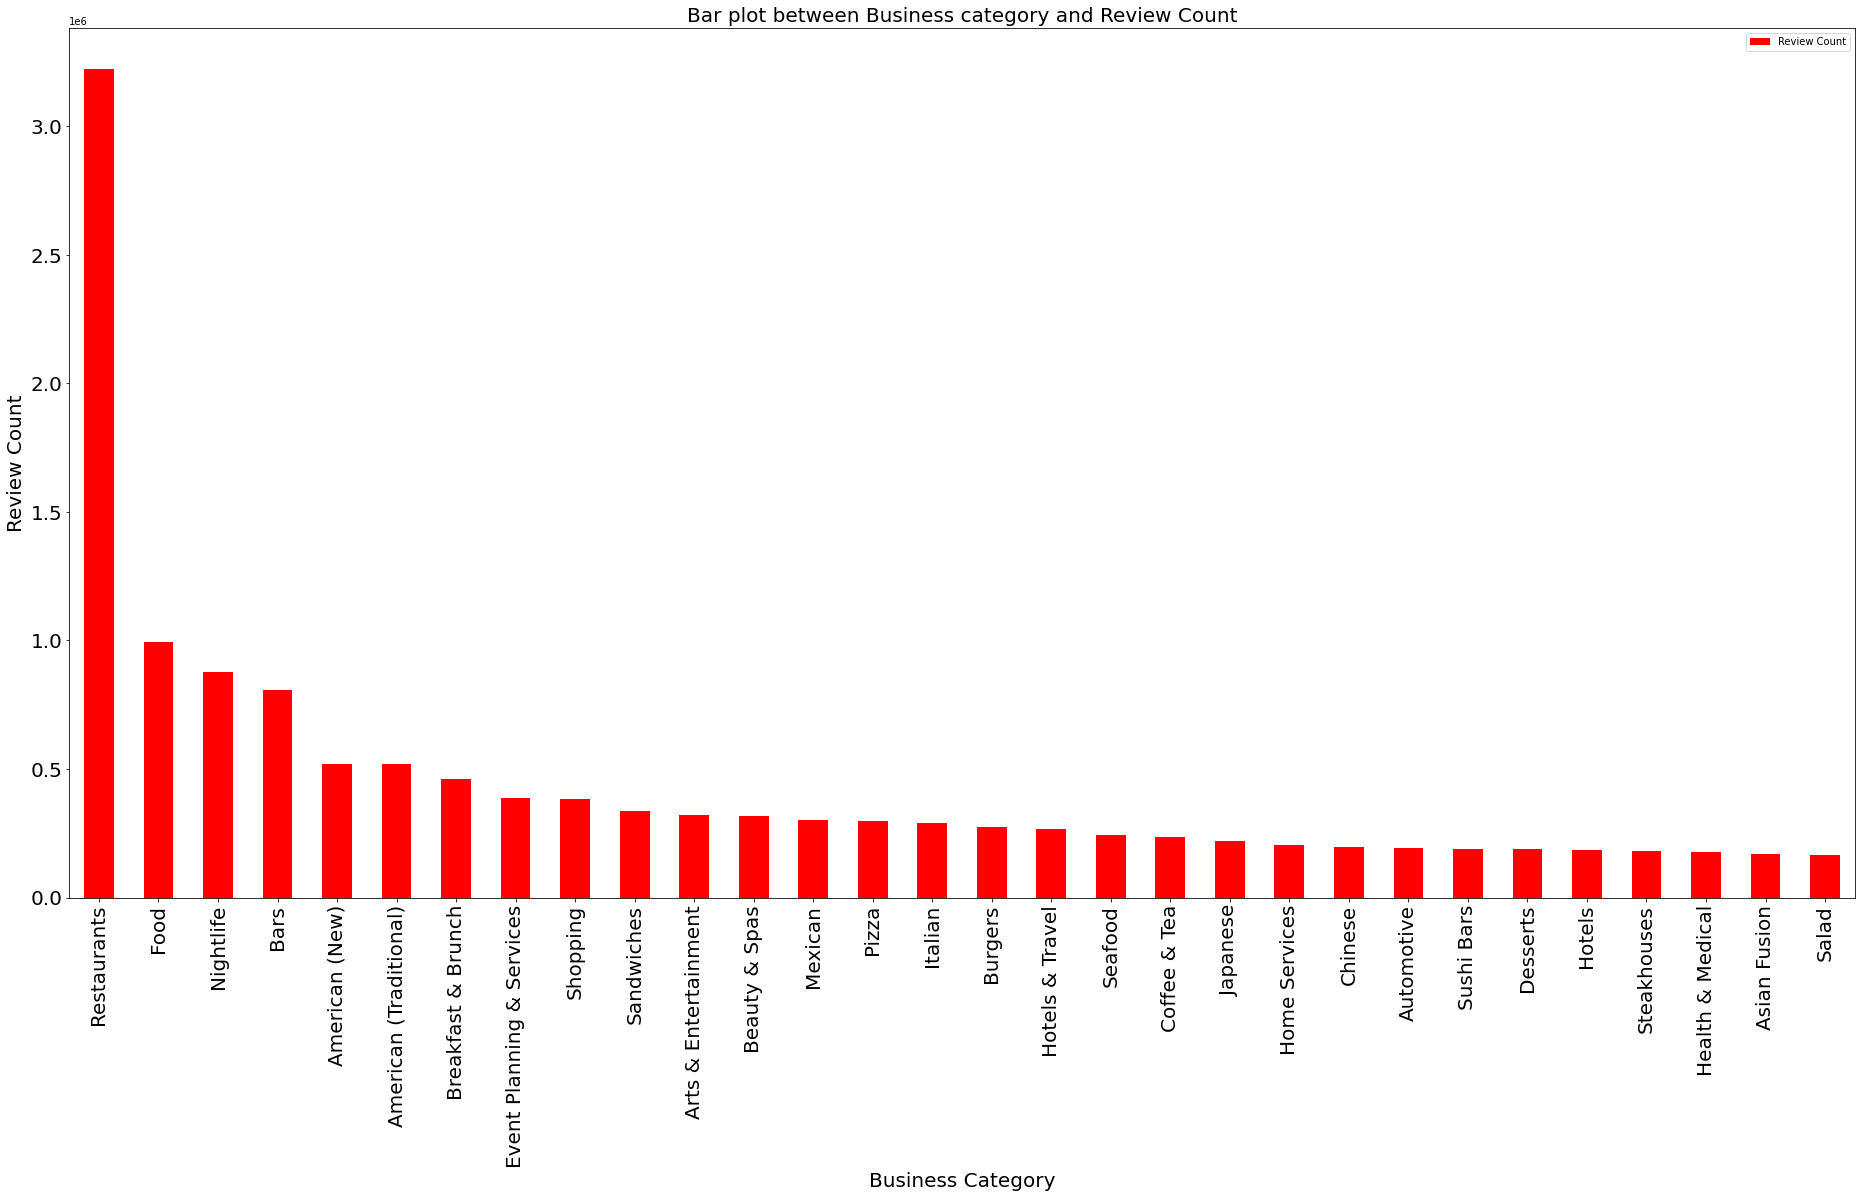

In [4]:
# Bar plot visualiasation for business category and review count
bar_graph = business_categories_vs_reviews.plot(kind='bar',stacked = 'True',width = 0.50,color= 'r',colormap='Paired',figsize=(32,16))
bar_graph.set_ylabel('Review Count',fontsize=20)
bar_graph.set_xlabel('Business Category',fontsize=20)
bar_graph.set_title('Bar plot between Business category and Review Count',fontsize=20)
for tick in bar_graph.get_xticklabels():
    tick.set_fontsize("20")
for tick in bar_graph.get_yticklabels():
    tick.set_fontsize("20")
plt.show()

In [0]:
def plot_line(df,header):
    # style
    plt.style.use('seaborn-whitegrid')

    # line plot
    # first is x axis, 2nd is y axis

    plt.plot(df[str(header[0])], df[str(header[1])], marker='', color='green', linewidth=3, alpha=1)

    # Add legend

    green_line = mlines.Line2D([], [], color='green', alpha=1, linewidth=4, label=str(header[1]))
    plt.legend(loc=1, ncol=2, handles=[green_line])
    
    # Add titles

    plt.xlabel(str(header[0]))
    plt.ylabel(str(header[1]))
    plt.show(block=False)


In [6]:
df = pd.DataFrame(
    {'Business_Categories': list(range(1,len(business_categories_vs_reviews)+1)),
     'No of Reviews': business_categories_vs_reviews['Review Count']
    })
display(df.head())

,Business_Categories,No of Reviews
Category,,
Restaurants,1,3221032
Food,2,991892
Nightlife,3,877146
Bars,4,806693
American (New),5,520330


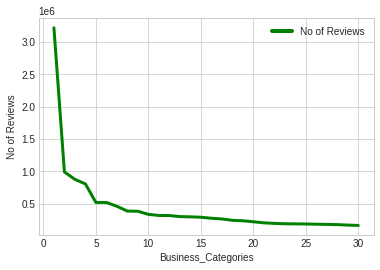

In [7]:
plot_line(df,list(df))

Displaying Top 20 states with maximum Reviews

In [10]:
state_vs_reviews = pd.read_csv('states-reviews.csv') # Csv file Contains 2 columns, state and reviews in each state
top_20_states_vs_reviews = (state_vs_reviews.pivot_table('Review Count', index= 'State')
                           .sort_values(by='Review Count', ascending=False)[:40])
print(" Top 20 states with max number of reviews")
display(top_20_states_vs_reviews.head(20))
print (len(state_vs_reviews))

 Top 20 states with max number of reviews


,Review Count
State,
NV,1824387
AZ,1627693
ON,634263
NC,307426
OH,243677
PA,229804
QC,146379
WI,109737
EDH,47889


68


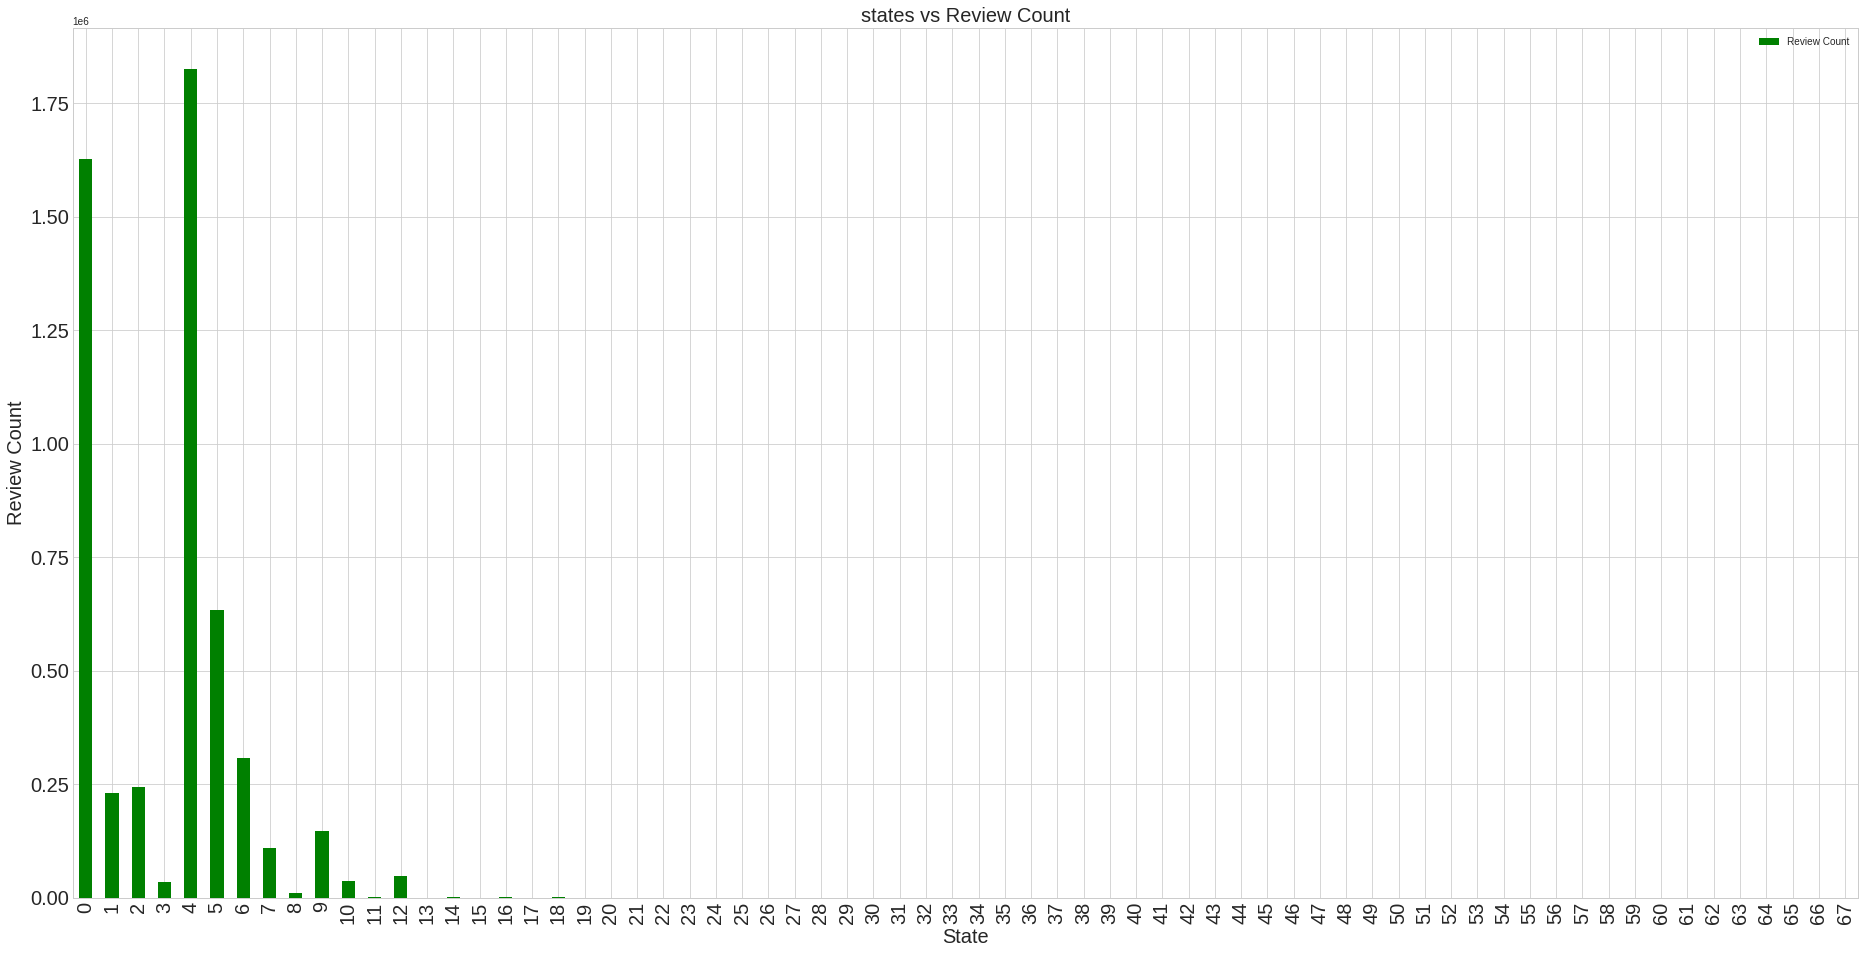

In [14]:
# Bar plot visualisation between states and Review Count
bar_graph = state_vs_reviews.plot(kind='bar',stacked = 'True',color= 'g',width = 0.50,figsize=(32,16))
bar_graph.set_ylabel('Review Count',fontsize=20)
bar_graph.set_xlabel('State',fontsize=20)
bar_graph.set_title('states vs Review Count',fontsize=20)
for tick in bar_graph.get_xticklabels():
    tick.set_fontsize("20")
for tick in bar_graph.get_yticklabels():
    tick.set_fontsize("20")
plt.show()

In [0]:
def plot_line2(X,Y,x_label,y_label,title,legend):
    # style
    plt.style.use('seaborn-darkgrid')

    # line plot
    # first is x axis, 2nd is y axis

    plt.plot(X, Y, marker='', color='blue', linewidth=1, alpha=1)

    # Add legend

    blue_line = mlines.Line2D([], [], color='blue', alpha=1, linewidth=2, label=legend)
    plt.legend(loc=1, ncol=2, handles=[blue_line])
   

    # Add titles
    plt.title(title, loc='left', fontsize=12, fontweight=0, color='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show(block=True)


In [0]:
df2 = pd.DataFrame(
    {
     'No of Reviews': state_vs_reviews['Review Count'],
     'State': list(range(1,len(state_vs_reviews)+1))
    })

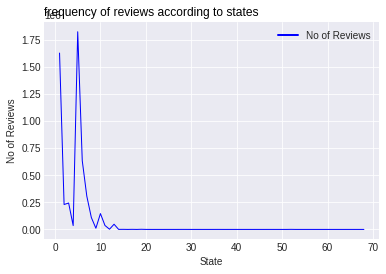

In [17]:
title = "frequency of reviews according to states"
header = list(df2)
plot_line2(df2[str(header[1])],df2[str(header[0])],str(header[1]),str(header[0]),title,str(header[0]))

Loading the Cities-reviews dataset and displaying top 20 reviews

In [18]:
cities_vs_reviews = pd.read_csv('cities-reviews.csv') # CSV  file contains Contains 2 columns, city and reviews in each city
cities_vs_reviews = cities_vs_reviews.pivot_table('Review Count', index='City').sort_values(by='Review Count', ascending=False)[:40]
display(cities_vs_reviews.head(20))

,Review Count
City,
Las Vegas,1604173
Phoenix,576709
Toronto,430923
Scottsdale,308529
Charlotte,237115
Pittsburgh,179471
Henderson,166884
Tempe,162772
Mesa,130883


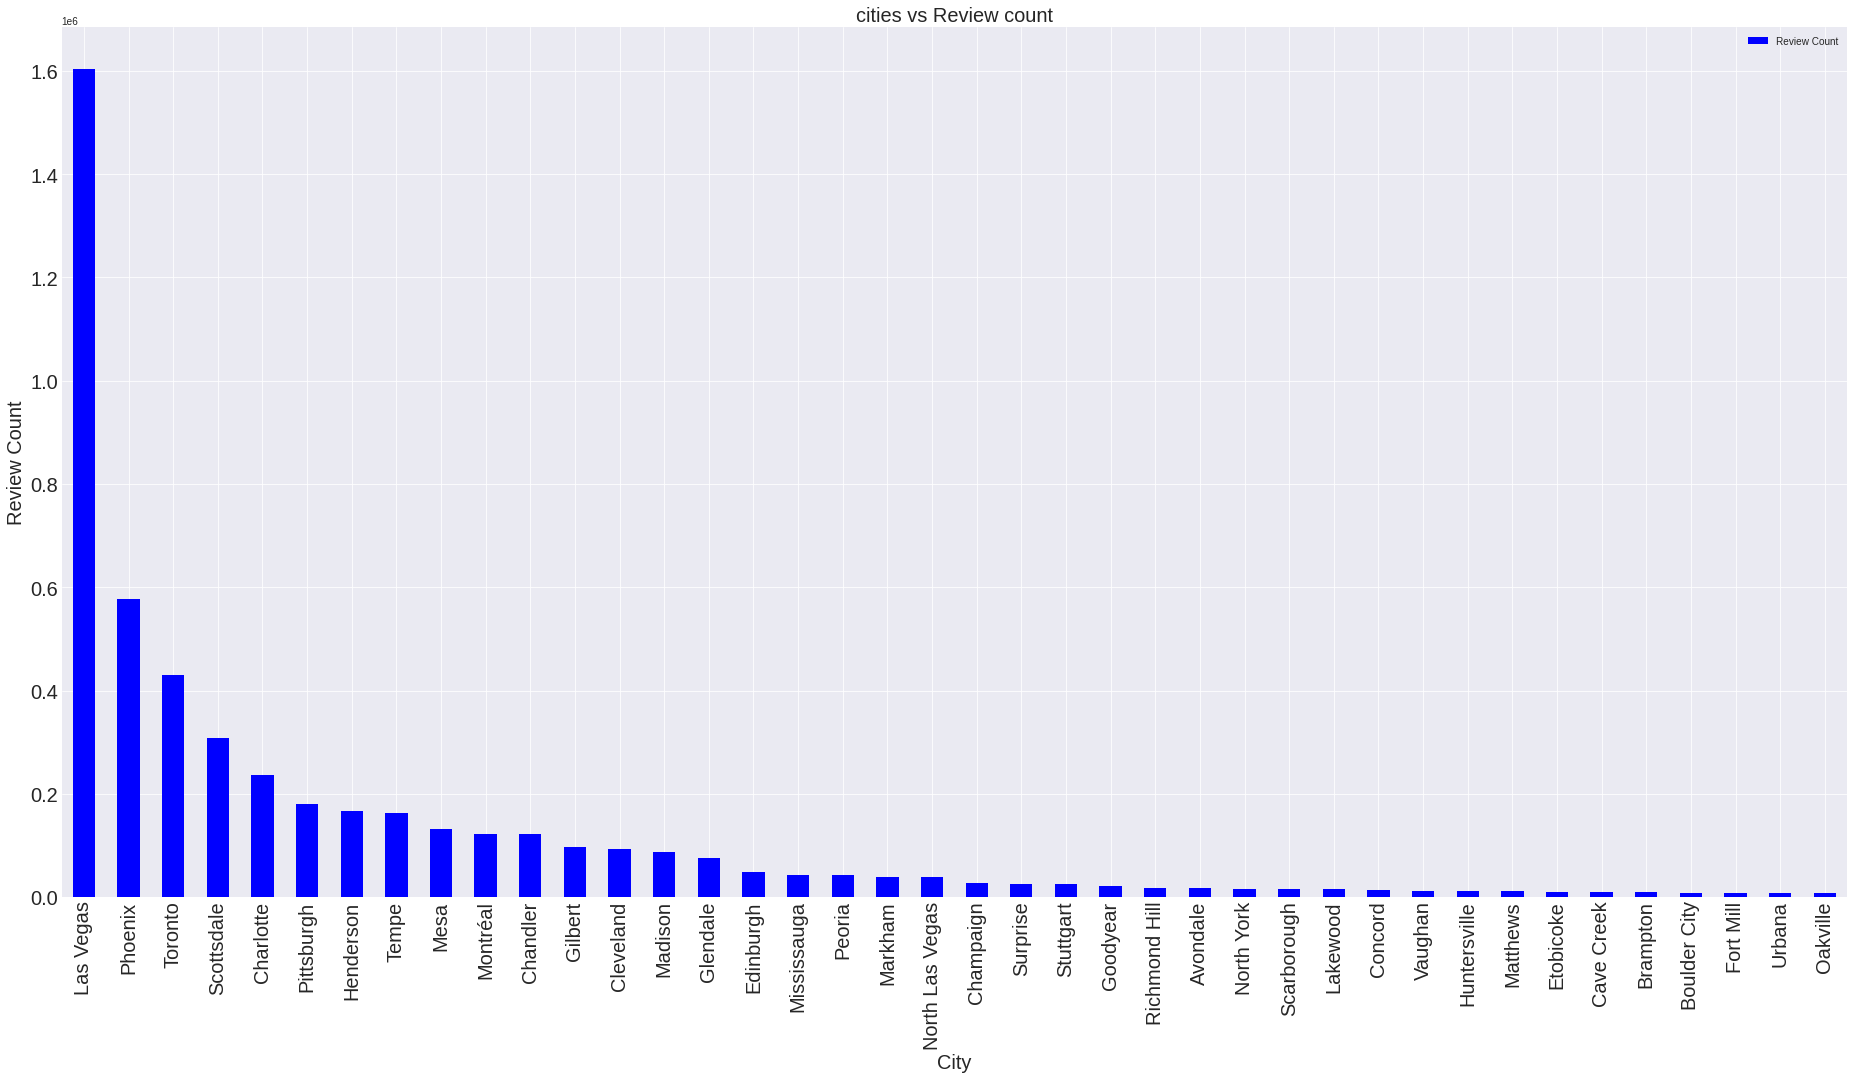

In [20]:
# Bar plot visualisation between City and Review count in that cities.
bar_graph = cities_vs_reviews.plot(kind='bar',color = 'b',width = 0.50,figsize=(32,16))
bar_graph.set_ylabel('Review Count',fontsize=20)
bar_graph.set_xlabel('City',fontsize=20)
bar_graph.set_title('cities vs Review count',fontsize=20)
for tick in bar_graph.get_xticklabels():
    tick.set_fontsize("20")
for tick in bar_graph.get_yticklabels():
    tick.set_fontsize("20")
plt.show()

In [0]:
df3 = pd.DataFrame(
    {'City': list(range(1,len(cities_vs_reviews)+1)),
     'No of Reviews': cities_vs_reviews['Review Count']
    })

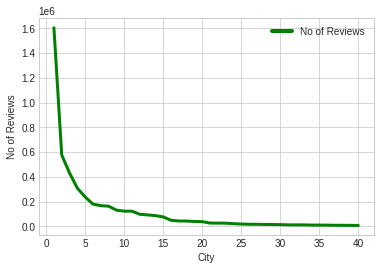

In [22]:
plot_line(df3,list(df3))